## Vilnius real estate used Apartment market analysis

* Purpose: analyse Vilnius real estate pricing changes during Covid-19 and post-Covid period (est. 2020.05-2020.08)
* Hypothesis: The uncertainty brought by Covid-19 should bring fluctuations in Vilnius real estate markets.
* Predictions:
  * 1. Increase in supply for apartments selling due to short-term rent demand drop and potential purchases hesitation due to market changes.
  * 2. Decrease in prices due to plummeting demand and potential increase of supply.

* Scope: data from one of main the Lithuanian real estate market portals used.
* Data loaded weekly to monitor market changes.
* New apartments (year > 2019) are excluded from analysis as only partial data of their full supply and pricing are  available.
* only furnished apartments are included in the analysis.  
### Weak points
* The apartments being sold data is available from April. A better picture would have been having the data from as early as January.
* The apartments being rented data is available from May. A better picture would also require early data, such as start of 2020.
* Spikes in weeks' data possible. Preferred way would be to load data daily and smooth out edges with weekly averages. Daily scrapping is out of scope owever.
* Data is based on posts and not actual objects in the market. There exists a practice of same object(apartment) postings in multiple districts (to make the object more visible and sell faster), that contributes to duplicate data. This duplicate data for the moment remains in dataset to support analysis splitting data into districts. 
* More sources could be included for analysis. This however can also result in duplicates.


### Importing initial preparation of data

In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
from toai.imports import *
%matplotlib notebook
#import REP_Functions as rf
import data_prep

C:\Users\tiesi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\tiesi\Anaconda3\lib\site-packages\toai\imports.py:79: UserWarning: Could not find kaggle.json. Make sure it's located in C:\Users\tiesi\.kaggle. Or use the environment method.
  warnings.warn(str(error))


In [2]:
df_raw = data_prep.create_df_raw()

df_raw.head()

,log_date,district,street,year,total_price,price_sq_m,nr_rooms,space_sq_m,floor,nr_floors,week
ID,,,,,,,,,,,
3,2020-04-09,Antakalnis,Antakalnio g.,2000,114000,1713.0,2,66.54,4,4,15
4,2020-04-09,Antakalnis,Antakalnio g.,1964,83000,1413.0,3,58.75,5,5,15
5,2020-04-09,Antakalnis,Antakalnio g.,1967,99000,1378.0,3,71.86,5,5,15
6,2020-04-09,Antakalnis,Antakalnio g.,1963,67500,1646.0,2,41.00,5,5,15
8,2020-04-09,Antakalnis,Antakalnio g.,1940,100000,1658.0,2,60.33,1,3,15


Working the outlayers
* Quantiles will be calculated individually for each day when the data was collected.
* Bottom 5 and top 5 % of the data will be removed from each day to improve quality of results.

In [3]:
df, df_agg = data_prep.create_df(df_raw)

In [5]:
df

,ID,log_date,district,street,year,total_price,price_sq_m,nr_rooms,space_sq_m,floor,nr_floors,week
3,NaN,2020-04-09,Antakalnis,Antakalnio g.,2000,114000,1713.0,2,66.54,4,4,15
4,NaN,2020-04-09,Antakalnis,Antakalnio g.,1964,83000,1413.0,3,58.75,5,5,15
5,NaN,2020-04-09,Antakalnis,Antakalnio g.,1967,99000,1378.0,3,71.86,5,5,15
6,NaN,2020-04-09,Antakalnis,Antakalnio g.,1963,67500,1646.0,2,41.00,5,5,15
8,NaN,2020-04-09,Antakalnis,Antakalnio g.,1940,100000,1658.0,2,60.33,1,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...
74748,NaN,2020-07-16,Žvėrynas,Vytauto g.,1940,55900,1694.0,1,33.00,1,2,29
74752,NaN,2020-07-16,Žvėrynas,Vytauto g.,1940,62000,1879.0,1,33.00,1,2,29
74753,NaN,2020-07-16,Žvėrynas,Vytauto g.,1940,99700,1793.0,4,55.59,1,2,29
74754,NaN,2020-07-16,Žvėrynas,Vytauto g.,1940,130000,1642.0,4,79.16,1,2,29


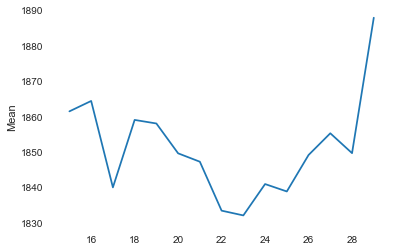

In [6]:
plt.plot(df_agg['Mean'])
plt.ylabel('Mean')
#axes = plt.gca()
#axes.set_xlim([0,2500])
#axes.set_ylim([1800,1850])
plt.show()

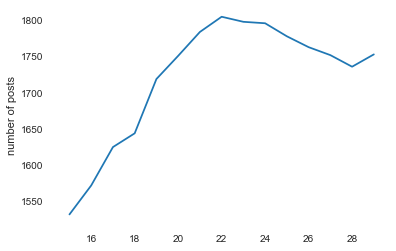

In [7]:
plt.plot(df_agg['nr_objects'])
plt.ylabel('number of posts')
#axes = plt.gca()
#axes.set_xlim([0,2500])
#axes.set_ylim([1500,2200])
plt.show()

In [ ]:
# plt.plot( 'log_date', 'Q1', data=quantiles_range, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'log_date', 'Q2', data=quantiles_range, marker='', color='olive', linewidth=2)
# plt.plot( 'log_date', 'Q3', data=quantiles_range, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# plt.legend()

* with outlyers (min & max 5%)

* without outlyers (min & max 5%)

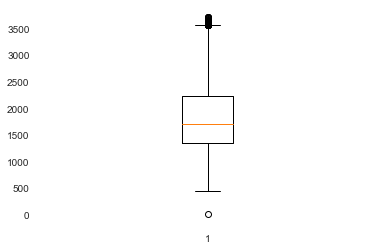

In [8]:
plt.boxplot(df['price_sq_m'])
plt.show()

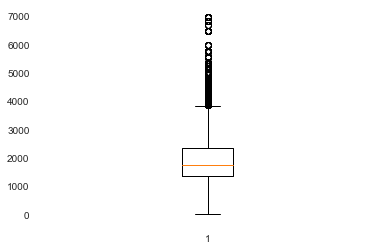

In [9]:
plt.boxplot(df_raw['price_sq_m'])
plt.show()

## Creation of data buckets for further analysis
* 3 Different apartment size buckets will be investigated:
  * < ~46 square meters. Small apartment category.
  * 45 to 66 square meters. Medium apartment category.
  * 66 to 120 square meters. Large apartment category.
* Categorization built based on Quantile-based discretization function towards three splits.

In [10]:
df['size_bucket'] = pd.qcut(df['space_sq_m'], q=3, labels=["small", "medium", "large"])
df.groupby('size_bucket').aggregate(np.mean)

,ID,year,total_price,price_sq_m,nr_rooms,space_sq_m,floor,nr_floors,week
size_bucket,,,,,,,,,
small,NaN,1979.527806,59905.765545,1776.590441,1.443425,33.426931,3.415336,5.596330,22.103183
medium,NaN,1988.862606,104633.456209,1847.346789,2.382554,56.790937,3.668319,6.322592,22.225094
large,NaN,1989.428706,163250.344187,1931.363230,3.191489,83.451078,3.639708,6.015517,22.129893


#### Average supply per apartment size

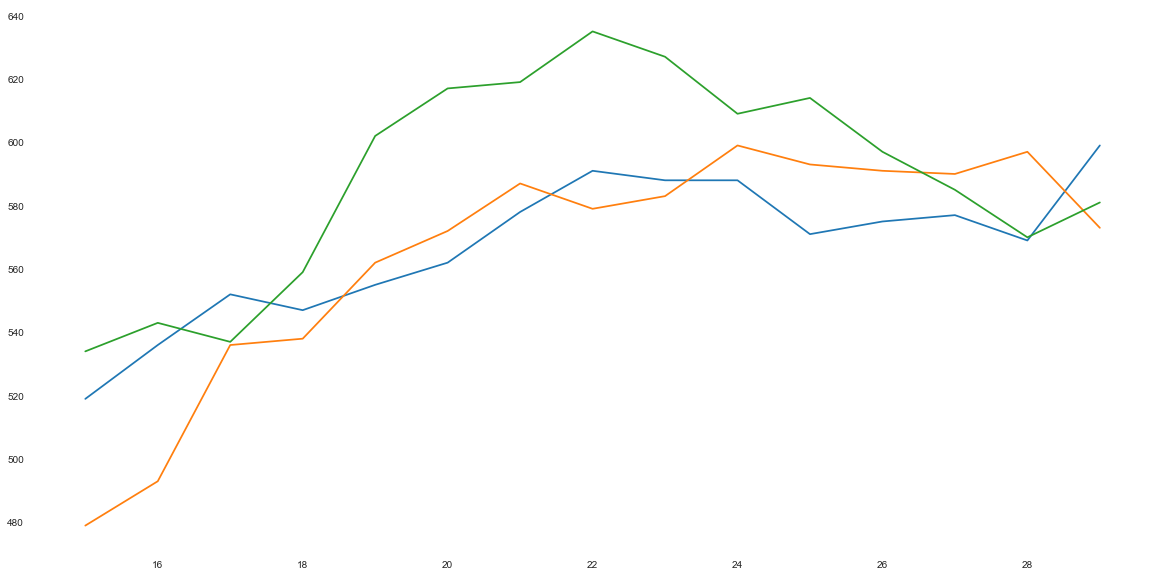

In [11]:
#df_small_app = df[df['size_bucket']=='9.999, 45.84'] 
size_bucket_data = df.groupby(['size_bucket', 'week'])['price_sq_m'].agg(['mean', 'count'])
size_bucket_data = size_bucket_data.reset_index(level=['size_bucket', 'week'])
size_bucket_data = size_bucket_data.set_index('week')
size_bucket_data.head()
size_bucket_data2 = size_bucket_data[size_bucket_data['size_bucket'] == 'large']
size_bucket_data2
plt.figure(figsize=(20,10))
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'large']['count'])
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'medium']['count'])
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'small']['count'])

#plt.ylabel('Mean')
#axes = plt.gca() 
#axes.set_xlim([0,2500])
#axes.set_ylim([0,700])

plt.show()

#### Average price sq m per apartment size

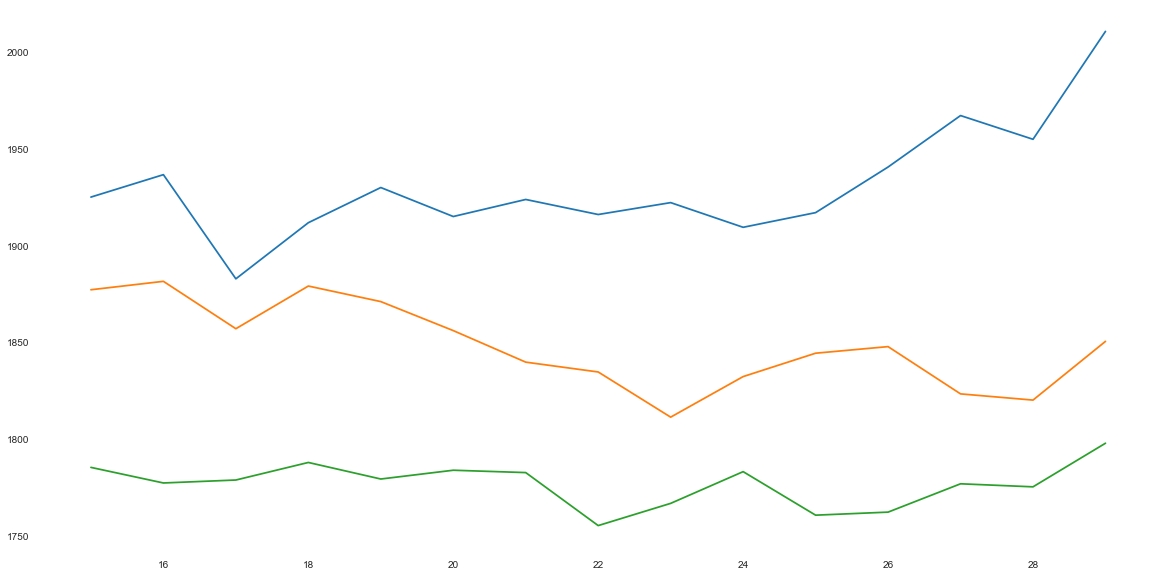

In [12]:
#df_small_app = df[df['size_bucket']=='9.999, 45.84'] 
size_bucket_data = df.groupby(['size_bucket', 'week'])['price_sq_m'].agg(['mean', 'count'])
size_bucket_data = size_bucket_data.reset_index(level=['size_bucket', 'week'])
size_bucket_data = size_bucket_data.set_index('week')
size_bucket_data.head()
size_bucket_data2 = size_bucket_data[size_bucket_data['size_bucket'] == 'large']
size_bucket_data2
plt.figure(figsize=(20,10))
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'large']['mean'])
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'medium']['mean'])
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'small']['mean'])

#plt.ylabel('Mean')
#axes = plt.gca()
#axes.set_xlim([0,2500])
#axes.set_ylim([0,700])

plt.show()

## District & street Rankings

In [13]:
#street ranking calculation
streets = df.groupby('street')['price_sq_m'].agg(['mean'])
streets['street_rank'] = pd.qcut(streets['mean'], q=10)
#district ranking calculation
districts = df.groupby('district')['price_sq_m'].agg(['mean'])
districts['district_rank'] = pd.qcut(districts['mean'], q=10)
                               
df = pd.merge(df, districts['district_rank'], on='district', how='outer')
df = pd.merge(df, streets['street_rank'], on='street', how='outer')

In [19]:
#df.head()

#districts.head
# districts_ranked = df.groupby('district_rank')['price_sq_m'].agg(['count','mean'])
# districts_ranked['district_rank2'] = pd.qcut(districts_ranked['mean'], q=10)
# districts_ranked.sort_values(by=['district_rank'])
df.groupby('street_rank')['price_sq_m'].agg(['mean'])



,mean
street_rank,
"(459.999, 1175.037]",1038.786885
"(1175.037, 1348.646]",1260.953569
"(1348.646, 1506.214]",1428.760954
"(1506.214, 1645.0]",1561.419234
"(1645.0, 1817.314]",1743.911405
"(1817.314, 2008.362]",1900.477592
"(2008.362, 2251.333]",2108.242062
"(2251.333, 2574.435]",2450.911591
"(2574.435, 2952.846]",2739.167582


In [13]:
# #df['space_sq_m']
# #df = df.reset_index()
# df['size_bucket'] = df.apply(define_size_bucket, axis=1)
# #df2['district_bucket'] = df2.apply(define_district_bucket, axis=1)

In [39]:
# #buckets calculation:
# apartment_sizes = df.groupby(['size_bucket', 'log_date']).aggregate(np.mean)
# apartment_sizes = apartment_sizes.sort_values(by=['price_sq_m'], ascending=False)
# apartment_sizes.reset_index(inplace=True)  
# apartment_sizes = apartment_sizes.set_index('log_date')
# apartment_sizes.sort_index
# #apartment_sizes

In [37]:


# #small_ap = apartment_sizes[apartment_sizes['size_bucket']==1]
# #small_ap
# plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==3], label='1')
# #line_down = plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==2], label='2')
# #plt.legend([line_up, line_down]
# #plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==3], label='3')
# #plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==4], label='4')
# #plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==5], label='5')
# #plt.ylabel('Mean')
# plt.show()
# #apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==1]

                                    

In [15]:
#apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==1]

## Correlation initial Analysis

In [16]:
df.columns
potentialFeatures = [ 'year', 'total_price',
       'price_sq_m',  'nr_rooms', 'space_sq_m',
        'floor', 'nr_floors', ]
    #   'size_bucket', 'district_rank', 'street_rank']
# check how the features are correlated with the price  sq m
for f in potentialFeatures:
    related = df['price_sq_m'].corr(df[f])
    print("%s: %f" % (f,related))

year: 0.065120
total_price: 0.701001
price_sq_m: 1.000000
nr_rooms: 0.063466
space_sq_m: 0.138020
floor: -0.093176
nr_floors: -0.128469


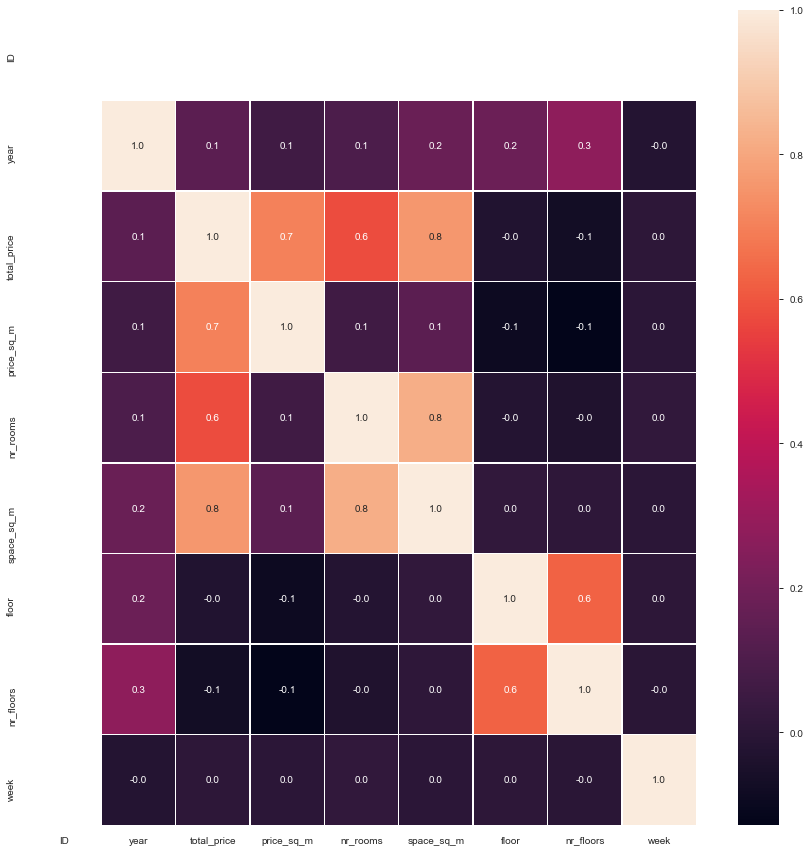

In [17]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

C:\Users\tiesi\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


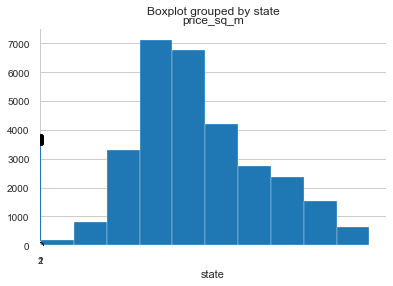

In [58]:
df.boxplot(column='price_sq_m', by='state')
df.price_sq_m.hist()

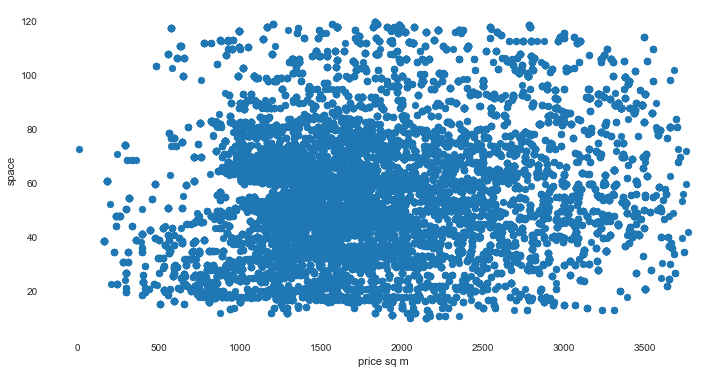

In [59]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['price_sq_m'], df['space_sq_m'])
ax.set_xlabel('price sq m')
ax.set_ylabel('space')
plt.show()

# Map work

In [30]:
import geopandas as gpd
import osmnx as ox
import networkx

Vilnius_map = "Vilnius,Lithuania"
graph = ox.graph_from_place(Vilnius_map)
networkx.classes.multidigraph.MultiDiGraph

nodes , streets_gdf = ox.graph_to_gdfs(graph)

<IPython.core.display.Javascript object>


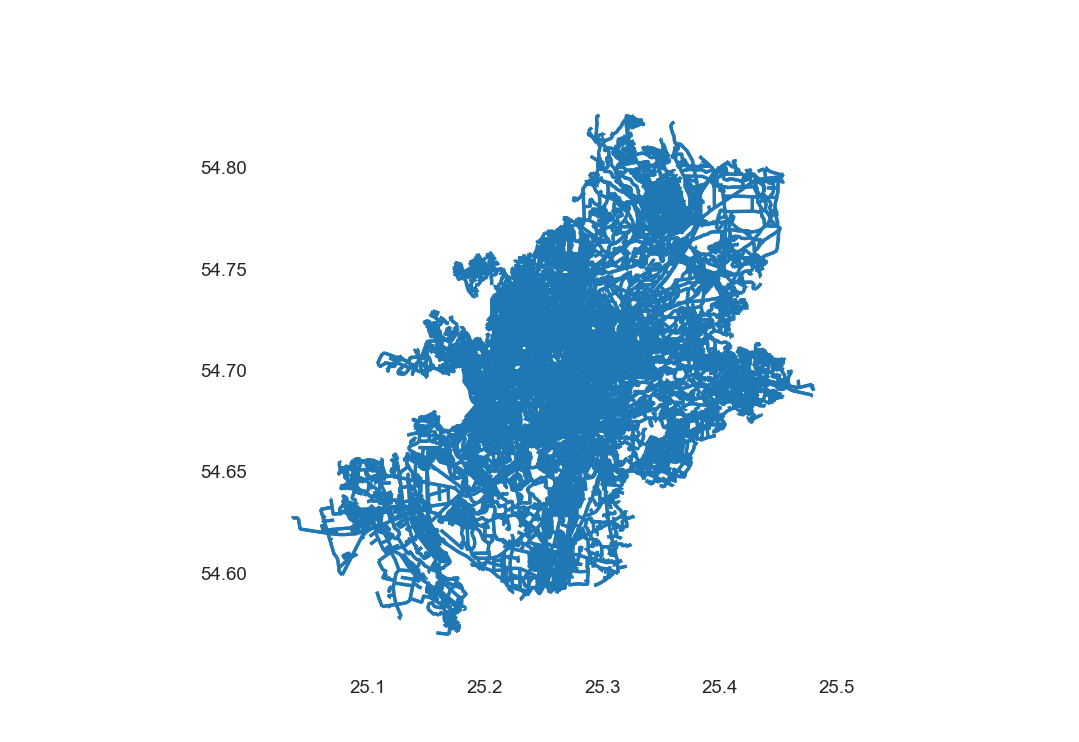

In [50]:
#streets.head()
#streets_gdf.head()
#streets_gdf = pd.merge(streets_gdf, streets['mean'], left_on='name', right_on='left')


fig2 =streets_gdf.plot()
#fig2 = plt.figure(figsize=(15,10))
#fig2.show()

,osmid,name,highway,oneway,length,service,maxspeed,geometry,lanes,ref,tunnel,access,bridge,width,junction,u,v,key
0,210992803,Kaniaviškių g.,residential,False,29.661,NaN,NaN,"LINESTRING (25.39225 54.67607, 25.39271 54.67609)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6585974785,5632274275,0
1,210992803,Kaniaviškių g.,residential,False,123.459,NaN,NaN,"LINESTRING (25.39225 54.67607, 25.39034 54.67596)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6585974785,4648073626,0
2,701261457,NaN,service,False,71.096,driveway,NaN,"LINESTRING (25.39225 54.67607, 25.39233 54.67543)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6585974785,6585974786,0
3,701261457,NaN,service,False,71.096,driveway,NaN,"LINESTRING (25.39233 54.67543, 25.39225 54.67607)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6585974786,6585974785,0
4,210992802,Kazio Bizausko g.,unclassified,False,33.843,NaN,50,"LINESTRING (25.39792 54.67697, 25.39787 54.67727)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6585974787,4587639180,0


Code below is either not used or to be used later:

In [20]:
#Skewness
# -1 / + 1 is considered regular
print(df['price_sq_m'].skew())
df['price_sq_m'].describe()

0.6931807408225388


count    25808.000000
mean      1850.834857
std        651.830500
min         10.000000
25%       1361.000000
50%       1714.000000
75%       2245.000000
max       3732.000000
Name: price_sq_m, dtype: float64

In [21]:
#Outlier treatment
#Quantile-based Flooring and Capping
Q1 = df['price_sq_m'].quantile(0.05)
Q3 = df['price_sq_m'].quantile(0.95)
print(Q1)
print(Q3)


data_1 = df[df['price_sq_m'] > Q1]
data_1 = df[df['price_sq_m'] < Q3]
print(data_1.shape)
#skewness differences
print(df['price_sq_m'].skew())
print(data_1['price_sq_m'].skew())


1006.0
3156.0
(24488, 15)
0.6931807408225388
0.5273906573676825


In [ ]:
#trimming
index = data[(data1['price_sq_m'] >= 3156.0)|(data['price_sq_m'] <= 1113.19)].index
data.drop(index, inplace=True)
data['price_sq_m'].describe()

In [ ]:
#IQR Score
#The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.
df3 = df['price_sq_m']

df_out = df3[~((df3 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

In [183]:
#date calculations
period = data_1.groupby('log_date').aggregate(np.mean)
period.head(5)

,is_new_project,reserved,price_change,is_auction,nr_stars,year,total_price,price_sq_m,rounded_price_sq_m,nr_rooms,space_sq_m,rounded_space_sq_m,floor,nr_floors,state,type,size_bucket
log_date,,,,,,,,,,,,,,,,,
2020-04-09,0.068239,0.016792,0.039741,0.023580,0.440157,1996.252233,122150.586995,1911.601286,1913.504823,2.467310,62.572008,62.574848,3.389425,6.643087,1.635584,1.0,2.964987
2020-04-10,0.069414,0.016269,0.040334,0.024223,0.438539,1996.203181,121593.971800,1909.622560,1911.641359,2.461678,62.394624,62.398771,3.392986,6.654736,1.626537,1.0,2.954447
2020-04-11,0.065789,0.016003,0.039469,0.021693,0.390825,1996.438122,122126.564367,1913.283428,1915.291607,2.466572,62.544733,62.548720,3.403627,6.656117,1.636913,1.0,2.964794
2020-04-12,0.067116,0.015980,0.039712,0.021662,0.348722,1996.610440,122044.691761,1913.732244,1915.838068,2.463778,62.482724,62.486506,3.400568,6.658026,1.634233,1.0,2.960582
2020-04-13,1.000000,1.000000,0.040013,1.000000,0.322557,1996.307112,121843.280532,1912.396911,1914.547414,2.459770,62.463696,62.465876,3.418822,6.672055,1.642960,1.0,2.958693


In [ ]:

# # district buckets:
# first_tier =['Senamiestis','Žvėrynas','Užupis', 'Filaretai']
# second_tier = ['Valakampiai','Naujamiestis', 'Šnipiškės','Turniškės']
# third_tier = ['Antakalnis', 'Šiaurės miestelis','Žirmūnai', 'Burbiškės', 'Visoriai',
#             'Avižienių k.', 'Tarandės k.', 'Verkiai','Markučiai','Santariškės', 'Saulėtekis']
# fourth_tier = ['Klevinės vs.','Baltupiai','Bajorai','Lazdynėliai','Pilaitė',
# 'Šeškinė','Viršuliškės','Jeruzalė','Vilkpėdė','Liepkalnis','Karoliniškės','Pašilaičiai','Rasos',
# 'Lazdynai','Dvarčionys','Avižieniai','Justiniškės','Bendorių k.','Kalnėnai','Fabijoniškės',
# 'Bukiškio k.','Tarandė','Skaidiškės','Bukčiai','Balsiai','Naujininkai']

# def define_district_bucket(df2):
#   if df2['district'] in first_tier:
#     return 1
#   elif df2['district'] in second_tier:
#     return 2
#   elif df2['district'] in third_tier:
#     return 3
#   elif df2['district'] in fourth_tier:
#     return 4
#   else:
#     return 5

# df2['size_bucket'] =  
# 		,CASE	WHEN a.space_sq_m < 30  THEN 1
# 				WHEN a.space_sq_m >= 30 and a.space_sq_m < 50 THEN 2
# 				WHEN a.space_sq_m >= 50 and a.space_sq_m < 70 THEN 3
# 				WHEN a.space_sq_m >= 70 and a.space_sq_m < 90 THEN 4
# 				ELSE 5
# 				END AS [size_bucket]
                
#    if col[:2]=='01':
#         df.rename(columns={col:'Gold' + col[4:]}, inplace=True)
#     if col[:2]=='02':
#         df.rename(columns={col:'Silver' + col[4:]}, inplace=True)
#     if col[:2]=='03':
#         df.rename(columns={col:'Bronze' + col[4:]}, inplace=True)
#     if col[:1]=='№':
#         df.rename(columns={col:'#' + col[1:]}, inplace=True) 
                

In [ ]:
# apartment size buckets:
def define_size_bucket(df):
  if df['space_sq_m'] < 30.0:
    return 1
  elif df['space_sq_m'] > 30.0 and df['space_sq_m']< 55.0:
    return 2
  elif df['space_sq_m'] > 55.0 and df['space_sq_m']< 70.0:
    return 3
  elif df['space_sq_m'] > 70.0 and df['space_sq_m']< 90.0:
    return 4
  else:
    return 5

In [ ]:
#street ranking calculation
streets = df.groupby('street').aggregate(np.mean)
streets
streets = streets.sort_values(by=['price_sq_m'], ascending=False)
streets = streets.reset_index()
streets['street_rank'] = streets.index
streets = streets[['street','street_rank']]

#district ranking calculation
districts = df.groupby('district').aggregate(np.mean)
districts = districts.sort_values(by=['price_sq_m'], ascending=False)
districts = districts.reset_index()
districts['district_rank'] = districts.index
districts = districts[['district','district_rank']]

df = pd.merge(df, districts, on='district', how='outer')
df = pd.merge(df, streets, on='street', how='outer')
